# Visualising data
#### following clustering and annotation (2024-11-12_Nikita-Clean_Clustering.jpynb) now visualising data

# Set up workspace:

In [ ]:
#load packages I need
import os
import tools
import scanpy as sc
import pandas as pd
import dandelion as ddl
from tqdm import tqdm
import matplotlib.pyplot as plt
import scanpy.external as sce
from matplotlib.pyplot import rc_context

In [ ]:
#show current directory 
os.getcwd()
os.chdir('/scratch/user/s4436039/scdata/Python_Integration_Sep')
os.getcwd()

'/scratch/user/s4436039/scdata/Python_Integration_Sep'

Print software versions:

In [ ]:
sc.logging.print_header()

scanpy==1.10.2 anndata==0.10.8 umap==0.5.6 numpy==1.26.4 scipy==1.14.0 pandas==2.2.2 scikit-learn==1.5.0 statsmodels==0.14.2 igraph==0.11.5 pynndescent==0.5.12


In [ ]:
ddl.logging.print_header()

dandelion==0.3.8 pandas==2.2.2 numpy==1.26.4 matplotlib==3.9.2 networkx==3.3 scipy==1.14.0


Set plotting parameters

In [ ]:
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [ ]:
# read in data
data = sc.read_h5ad('NRclean_clustered.h5ad')

# UMAP
* and split by cluster

# Calculate DEG genes between clusters
* visualise with heatmap 

# Plot cluster proportions by sample type, cancer type, tissue etc

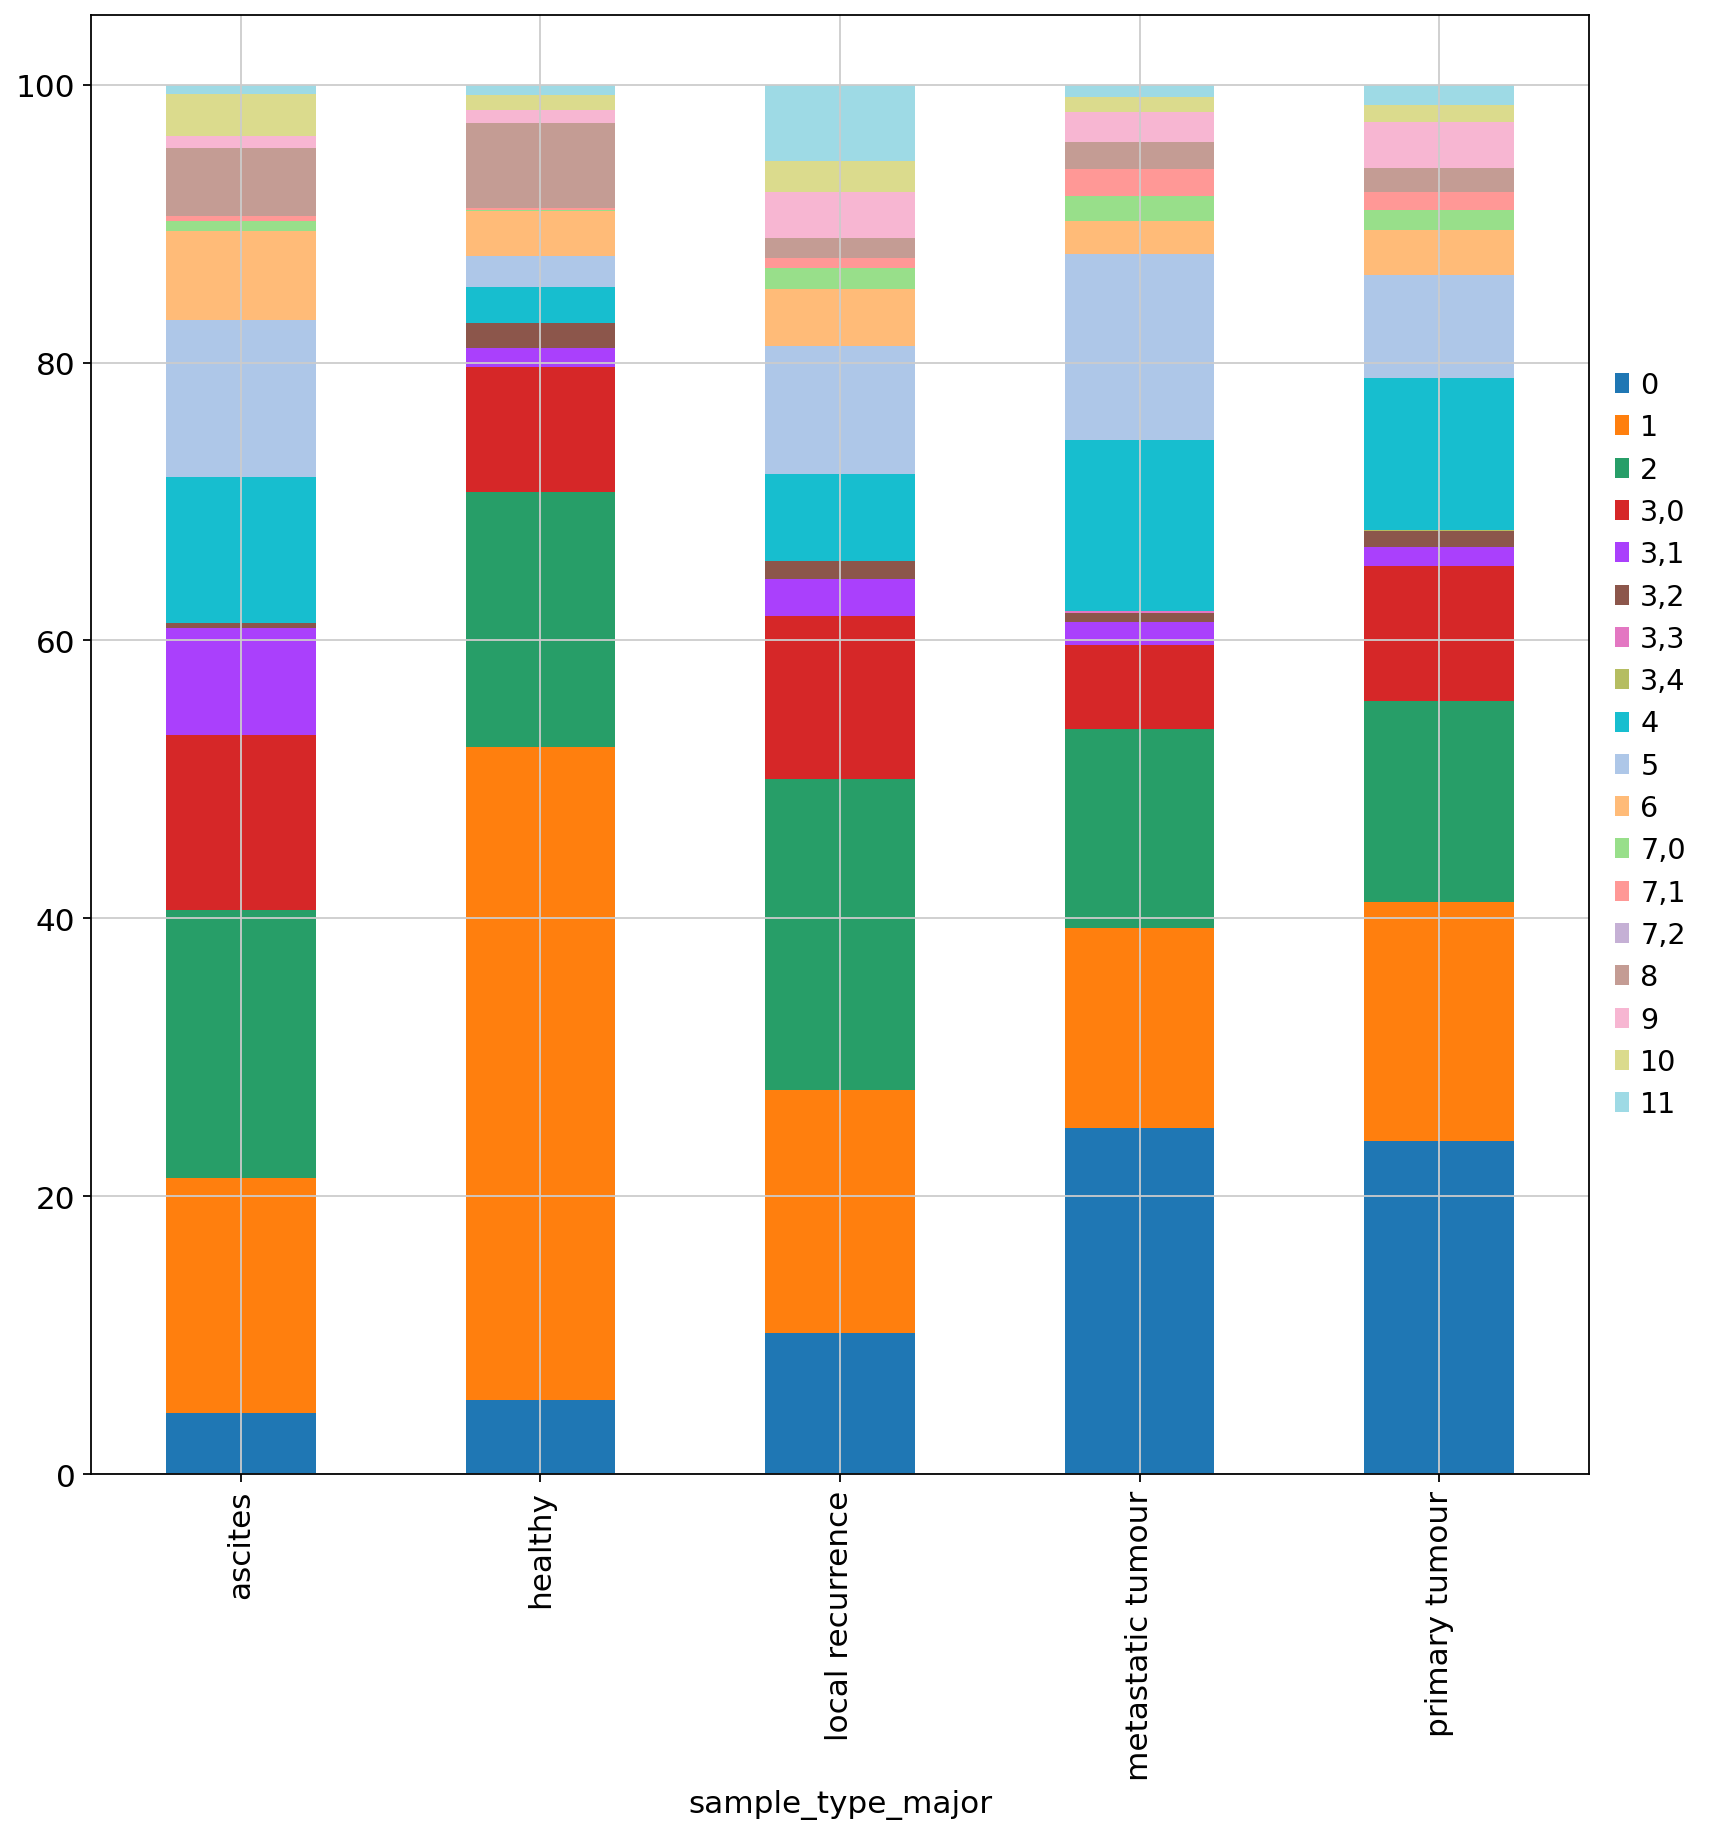

In [ ]:
#### Creating a stacked bar
pd.crosstab(data.obs["sample_type_major"], data.obs["clean-leiden_subcluster2"]).apply(
    lambda r: r / r.sum() * 100, axis=1
).plot.bar(stacked=True, figsize=(12,12))
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left", frameon=False)

In [ ]:
#table: 

# Creating the crosstab with percentages
table = pd.crosstab(data.obs["cancer_subtype"], data.obs["clean-leiden_subcluster2"]).apply(
    lambda r: r / r.sum() * 100, axis=1)

In [ ]:
table

clean-leiden_subcluster2,0,1,2,"3,0","3,1","3,2","3,3","3,4",4,5,6,"7,0","7,1","7,2",8,9,10,11
cancer_subtype,,,,,,,,,,,,,,,,,,
Acral Melanoma,15.031315,2.713987,15.657620,3.131524,2.922756,1.670146,0.000000,0.000000,4.592902,2.087683,20.041754,0.000000,0.208768,0.000000,0.835073,11.273486,7.724426,12.108559
BRCA1 TNBC,18.045727,16.303756,15.541644,6.015242,2.041372,1.252041,0.000000,0.000000,16.385411,10.914535,5.144257,1.415351,1.088732,0.000000,0.489929,1.524224,1.415351,2.422428
Breast Cancer,12.724307,20.473083,9.502447,16.231648,2.691680,0.530179,0.040783,0.000000,20.024470,7.789560,4.690049,0.122349,0.326264,0.000000,1.019576,1.182708,1.182708,1.468189
Breast DCIS,18.534299,26.842778,1.278228,17.043034,0.766937,0.298253,0.000000,0.000000,11.930124,2.513847,1.576481,5.752024,5.581594,5.922454,0.511291,0.426076,0.383468,0.639114
Breast IDC,18.213177,12.142118,10.348396,12.107623,2.000690,0.896861,0.034495,0.000000,13.763367,4.208348,7.105899,2.656088,1.034840,0.000000,1.759227,2.380131,3.552949,7.795792
CRC,32.353699,19.180201,12.193864,10.569734,1.469451,1.134313,0.000000,0.000000,4.485692,7.837071,3.480278,1.134313,0.567156,0.025780,1.160093,1.160093,1.288992,1.959268
ER Breast Cancer,20.784766,20.877092,4.824005,16.722447,0.854010,0.854010,0.057703,0.000000,14.264282,4.443162,4.120023,2.642816,2.573572,0.000000,0.715522,3.208309,1.673399,1.384882
GAC,10.628019,13.181504,32.953761,10.006901,1.759834,1.035197,0.000000,0.000000,4.934438,5.797101,6.763285,0.552105,0.310559,0.000000,4.727398,0.828157,1.587302,4.934438
GBM,46.245222,9.429580,12.655101,5.186710,0.885034,0.743899,0.367539,0.000000,7.397824,3.002058,1.896501,1.428991,0.829168,0.002940,0.776242,8.306380,0.611585,0.235225


# Plot DC proportions as box plots

In [ ]:
import seaborn as sns

In [ ]:
# Step 1: Calculate proportion of cDC1 cells per sample and cancer subtype
# Create a DataFrame with sample, subtype, and whether each cell is "cDC1"
df = data.obs[["integration_id", "cancer_subtype", "NR_annotations"]].copy()
df["is_cDC1"] = df["NR_annotations"] == "cDC1"

In [ ]:
# Calculate proportions of cDC1 cells per sample within each cancer subtype
proportion_df = (
    df.groupby(["integration_id", "cancer_subtype"])["is_cDC1"]
    .mean()
    .reset_index()
    .rename(columns={"is_cDC1": "cDC1_proportion"})
)

/scratch/temp/11532413/ipykernel_4150444/2715428096.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


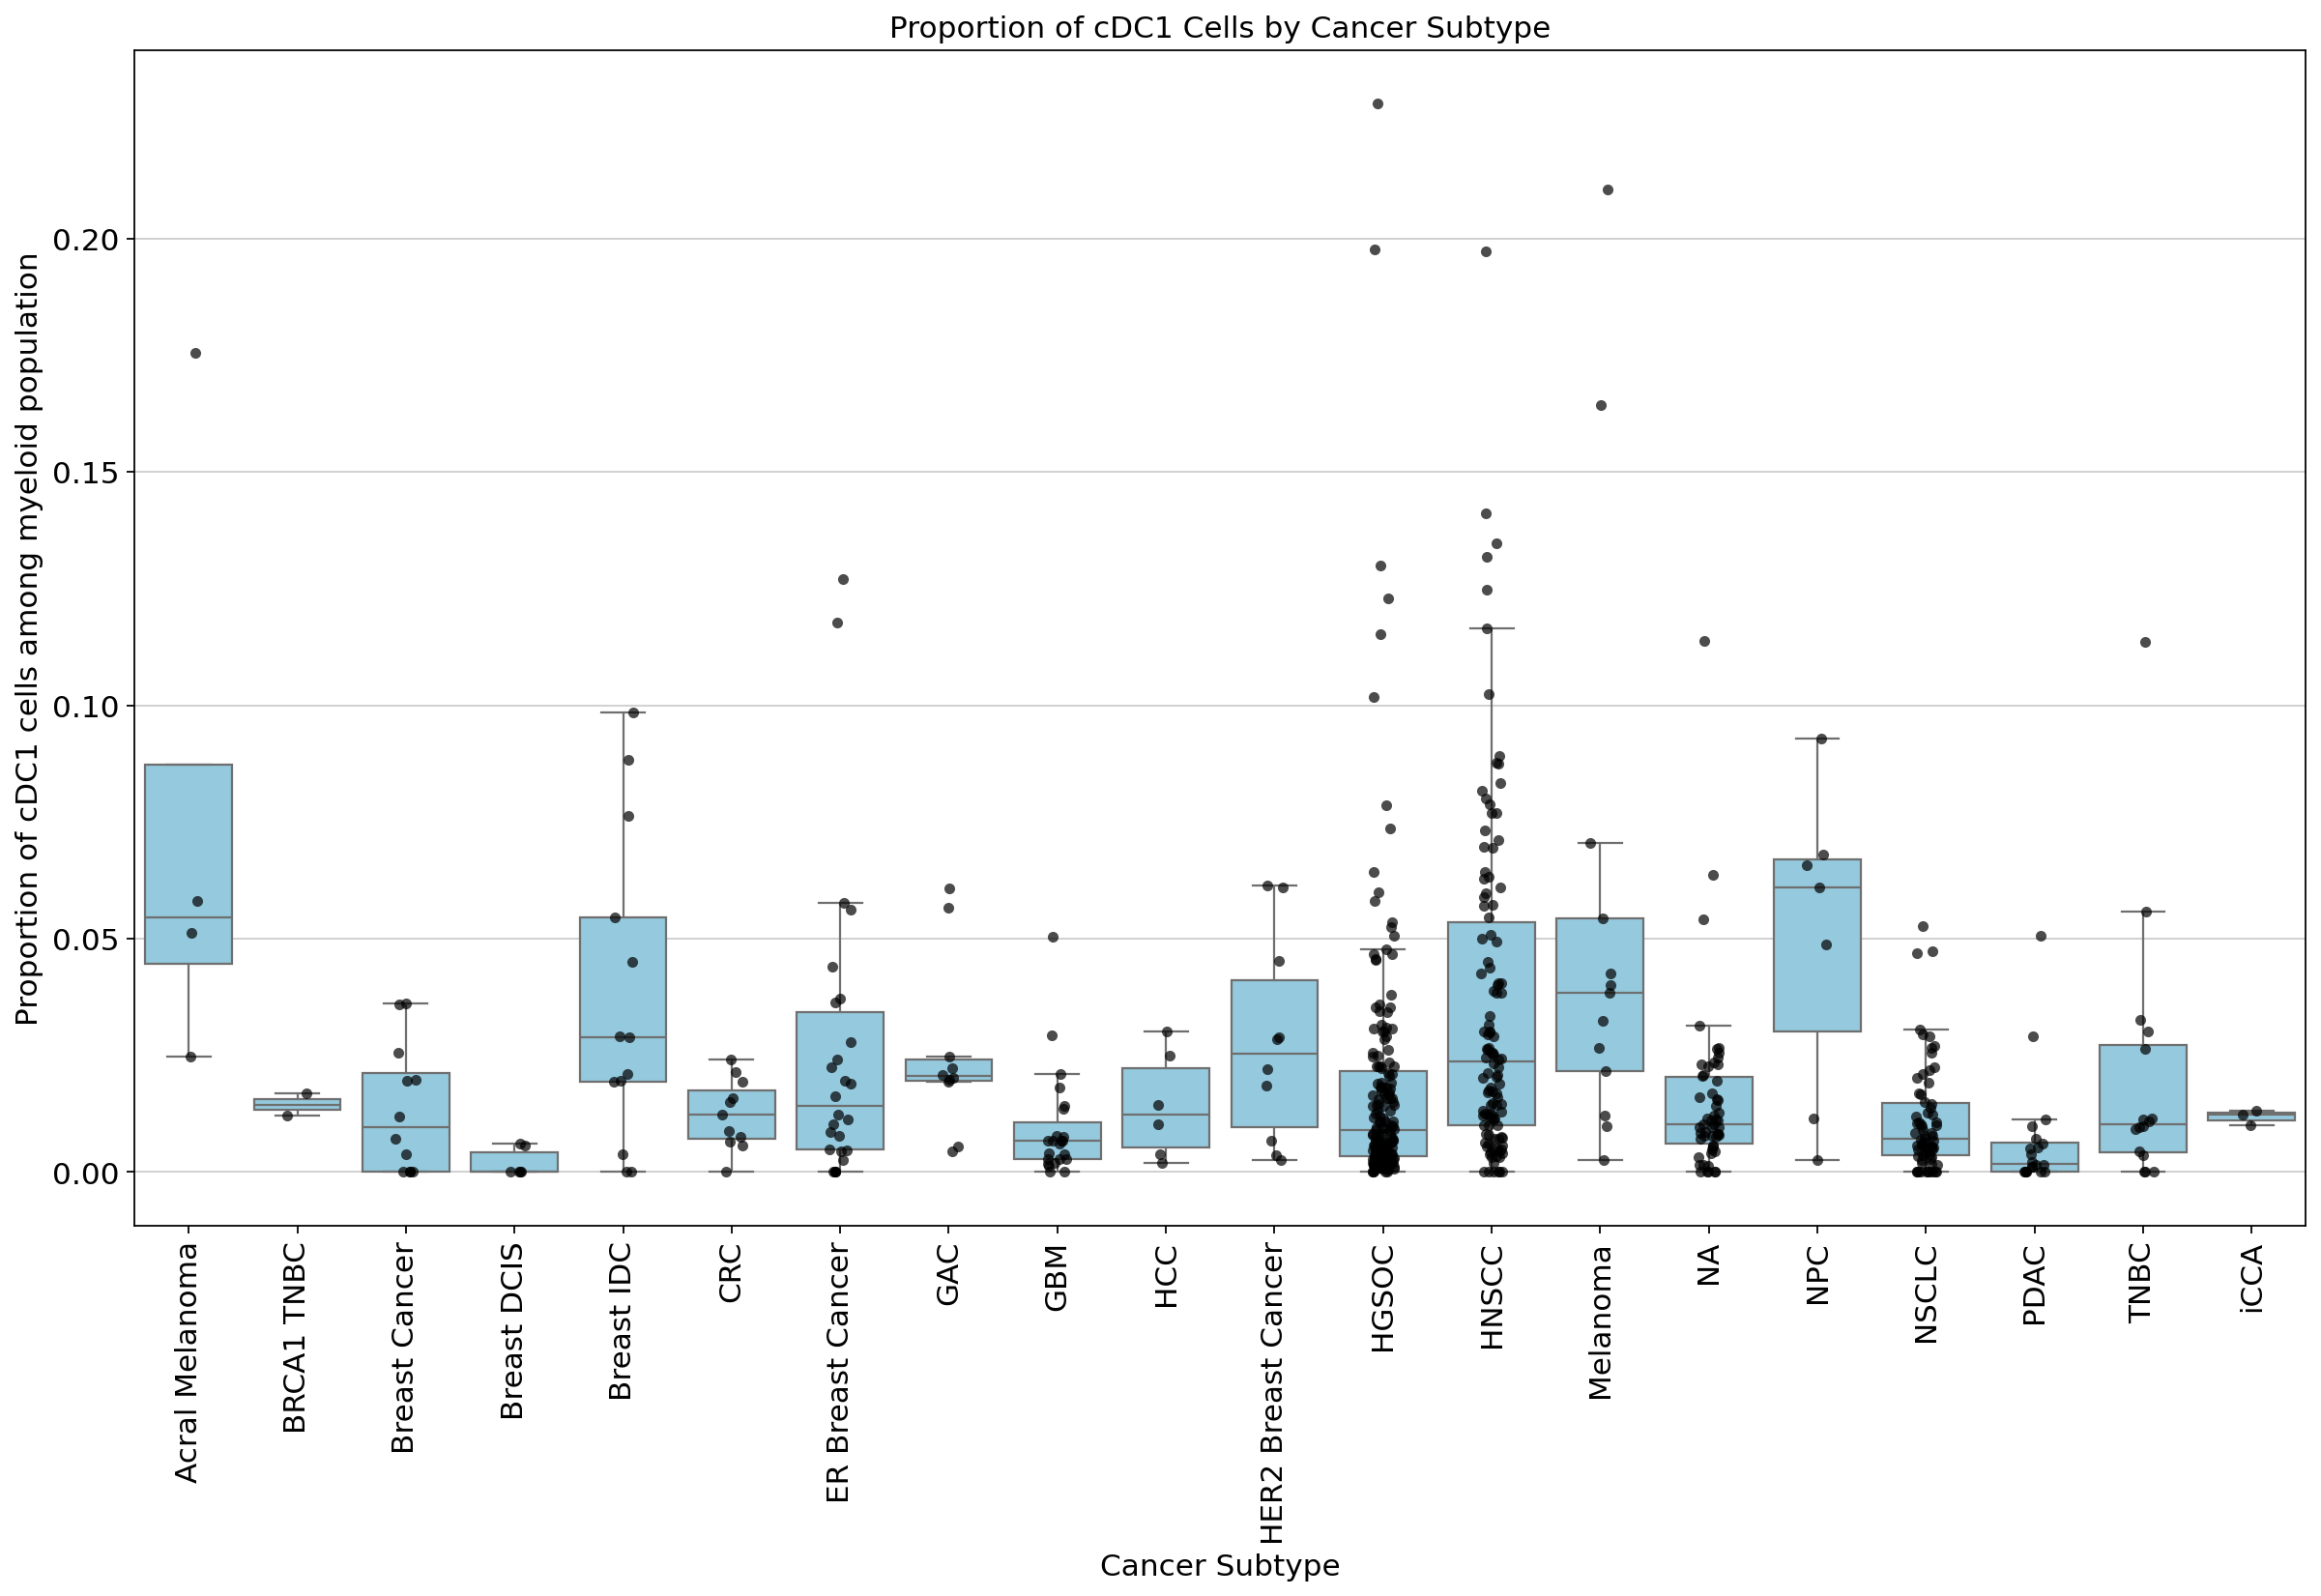

In [ ]:
# Set up the plot
plt.figure(figsize=(18, 10))

# Create the box plot
sns.boxplot(
    x="cancer_subtype", y="cDC1_proportion", data=proportion_df,
    color="skyblue",
    showfliers=False  # Optionally hide outliers if they overlap with strip points
)

# Overlay individual data points as a scatter (strip plot)
sns.stripplot(
    x="cancer_subtype", y="cDC1_proportion", data=proportion_df,
    color="black", size=5, jitter=True, alpha=0.7  # Adjust appearance of data points
)

# Customize plot labels
plt.ylabel("Proportion of cDC1 cells among myeloid population")
plt.xlabel("Cancer Subtype")
plt.title("Proportion of cDC1 Cells by Cancer Subtype")

# Make x-axis labels vertical for readability if needed
plt.xticks(rotation=90)

# Show plot
plt.show()

# overlay select gene sets on UMAP

# show canonical markers
* heatmap? UMAP overlay? dot plot?

# atlas summary plots: number of samples/cells by cancer type, tissue type, site etc